In [3]:
import pandas as pd


In [4]:
july_fileT = "ThonglorSalesJuly2023.csv"
august_fileT = "ThonglorSalesAugust2023.csv"
sep_fileT = "ThonglorSalesSeptember2023.csv"

df_julyt = pd.read_csv(july_fileT)
df_augustt = pd.read_csv(august_fileT)
df_sept = pd.read_csv(sep_fileT)

In [5]:
data_frames_t = [df_julyt, df_augustt, df_sept]

In [6]:
total_sale_julyt = df_julyt['Total Sales'].sum()
print(f"Total Sale for df_julyt: {total_sale_julyt:.2f}")


Total Sale for df_julyt: 353910.00


In [6]:
total_sale_augustt = df_augustt['Total Sales'].sum()
print(f"Total Sale for df_augustt: {total_sale_augustt:.2f}")


Total Sale for df_augustt: 335230.00


In [7]:
total_sale_sept = df_sept['Total Sales'].sum()
print(f"Total Sale for df_sept: {total_sale_sept:.2f}")

Total Sale for df_sept: 306145.00


### Thonglor Prediction for OCT 2023

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


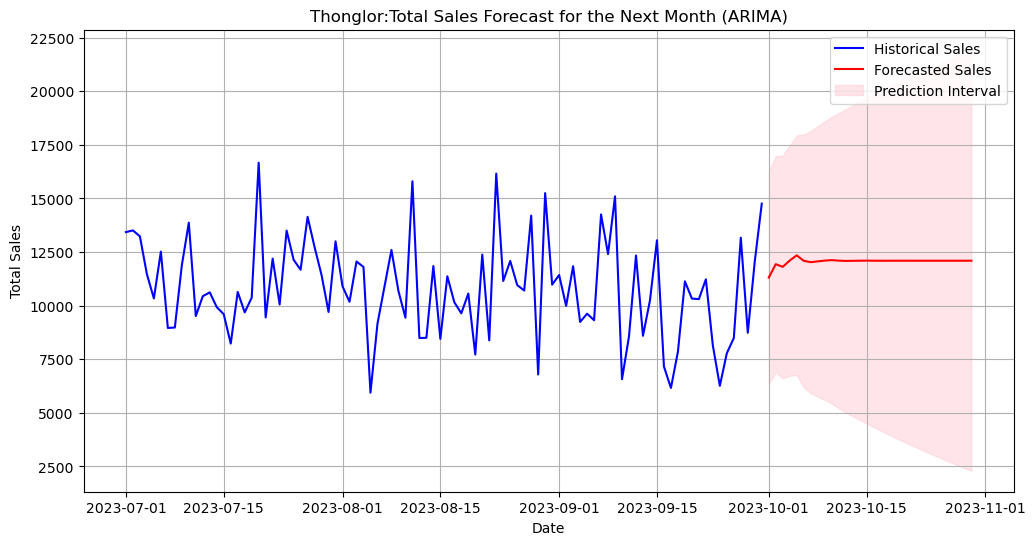

 Thonglor: Total Sales Forecast for the Next Month (ARIMA):
            Forecasted Sales
2023-10-01      11306.906278
2023-10-02      11935.551412
2023-10-03      11810.136008
2023-10-04      12103.715808
2023-10-05      12347.558009
2023-10-06      12092.465176
2023-10-07      12027.911149
2023-10-08      12065.788598
2023-10-09      12100.426125
2023-10-10      12123.158339
2023-10-11      12100.397544
2023-10-12      12086.236316
2023-10-13      12090.949970
2023-10-14      12097.096381
2023-10-15      12099.259320
2023-10-16      12096.815997
2023-10-17      12094.753686
2023-10-18      12095.186800
2023-10-19      12096.138094
2023-10-20      12096.416257
2023-10-21      12096.107442
2023-10-22      12095.828533
2023-10-23      12095.864114
2023-10-24      12095.998541
2023-10-25      12096.040565
2023-10-26      12095.999960
2023-10-27      12095.961909
2023-10-28      12095.964539
2023-10-29      12095.982784
2023-10-30      12095.989270


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# Combine the data frames
data_frames_t = [df_julyt, df_augustt, df_sept]
combined_data = pd.concat(data_frames_t)

# Ensure the 'Date' column is in datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Set 'Date' as the index for time series analysis
combined_data.set_index('Date', inplace=True)

# Model Selection (ARIMA)
p = 5  # Autoregressive order
d = 1  # Differencing order
q = 0  # Moving average order

model = ARIMA(combined_data['Total Sales'], order=(p, d, q))
model_fit = model.fit()

# Forecasting only the next month
forecast_periods =  30 # Forecast for the next 30 days (approximately one month)
forecast = model_fit.get_forecast(steps=forecast_periods)

# Extract the forecasted values for the next month
forecast_values = forecast.predicted_mean
forecast_dates = [combined_data.index[-1] + pd.DateOffset(days=i) for i in range(1, forecast_periods + 1)]
forecast_df = pd.DataFrame({'Forecasted Sales': forecast_values}, index=forecast_dates)

# Plot historical sales and the forecast for the next month
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['Total Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')
plt.fill_between(forecast_dates, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.4, label='Prediction Interval')

plt.title('Thonglor:Total Sales Forecast for the Next Month (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecast for the next month
print(" Thonglor: Total Sales Forecast for the Next Month (ARIMA):")
print(forecast_df)


In [18]:
import numpy as np

# Actual values and predicted values
actual_values = [9460, 12940, 8160, 9795, 8120, 1240, 8010, 10165, 10960, 7430,12650,13085,13845,8340]
predicted_values = [11306.906278, 11935.551412, 11810.136008, 12103.715808, 12347.558009, 12092.465176, 12027.911149, 12065.788598, 12100.426125, 12123.158339,
                    12100.397544,12086.236316,12090.949970,12097.096381]


# Calculate the mean of actual values
mean_actual = np.mean(actual_values)

# Calculate the mean of predicted values
mean_predicted = np.mean(predicted_values)

print(f"Mean of Actual Values: {mean_actual}")
print(f"Mean of Predicted Values: {mean_predicted}")


Mean of Actual Values: 9585.714285714286
Mean of Predicted Values: 12020.59265092857


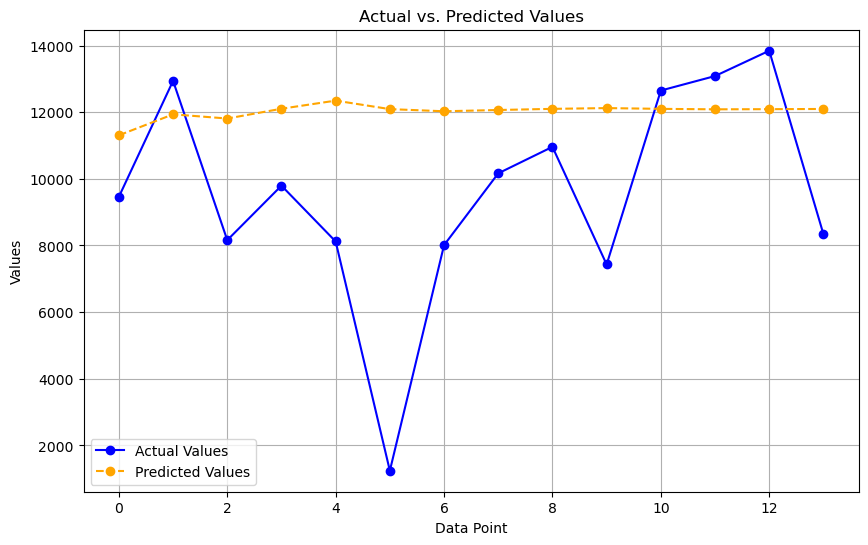

Mean of Actual Values: 9585.714285714286
Mean of Predicted Values: 12020.59265092857


In [21]:
# Plot actual and predicted values in a line graph
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Values', marker='o', linestyle='-', color='blue')
plt.plot(predicted_values, label='Predicted Values', marker='o', linestyle='--', color='orange')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)

plt.show()

print(f"Mean of Actual Values: {mean_actual}")
print(f"Mean of Predicted Values: {mean_predicted}")

### Total Sales / Staff

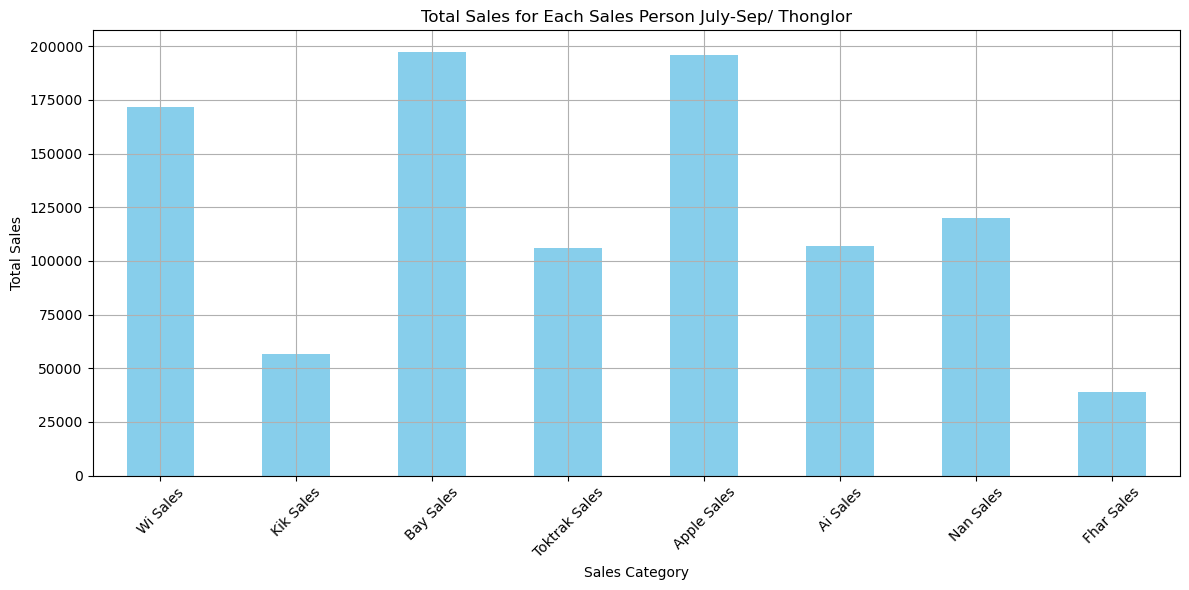

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# List of data frames for each month
data_frames_t = [df_julyt, df_augustt, df_sept]

# Concatenate the data frames to combine the data
combined_data = pd.concat(data_frames_t)

# Select the columns of interest
columns_of_interest = ['Wi Sales', 'Kik Sales', 'Bay Sales', 'Toktrak Sales', 'Apple Sales', 'Ai Sales', 'Nan Sales', 'Fhar Sales']

# Extract the relevant data
sales_data = combined_data[columns_of_interest]

# Plot the data using a bar graph
sales_data.sum().plot(kind='bar', figsize=(12, 6), color='skyblue')

# Customize the plot
plt.title('Total Sales for Each Sales Person July-Sep/ Thonglor')
plt.xlabel('Sales Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### To find the 5 dates with the highest total sales in a DataFrame

In [7]:
import pandas as pd

# Concatenate the dataframes
data_frames_t = [df_julyt, df_augustt, df_sept]
combined_df = pd.concat(data_frames_t)

# Sort the dataframe by total sales in descending order
sorted_df = combined_df.sort_values(by='Total Sales', ascending=False)

# Get the first 5 dates with the highest total sales
top_5_dates = sorted_df['Date'].head(5)

# Display the top 5 dates
top_5_dates

19        July 20, 2023
22      August 23, 2023
10      August 11, 2023
29      August 30, 2023
8     September 9, 2023
Name: Date, dtype: object

In [8]:
# Sort df_julys by 'Total Sales' in descending order and select the top 5 rows
top_5_dates = df_julyt.sort_values(by='Total Sales', ascending=False).head(5)

# Display the top 5 dates
top_5_dates


,Date,Wi Cust,Wi Sales,Kik Cust,Kik Sales,Bay Cust,Bay Sales,Toktrak Cust,Toktrak Sales,Apple Cust,...,Total Sales,Voucher Amount,TIP,Total Cash Amount,Sales Doc,TF Doc,TF Date,In Charged,Book Bank Checked,เว้นไว้
19,"July 20, 2023",7,3390,6,2440,5,3150,0,0,7,...,16670,800,50,15820,NaN,NaN,NaN,NaN,No,NaN
26,"July 27, 2023",6,2690,4,2990,6,2700,0,0,6,...,14145,350,0,13795,NaN,NaN,NaN,NaN,No,NaN
9,"July 10, 2023",6,3150,0,0,7,3000,6,2370,5,...,13870,500,0,13370,NaN,NaN,NaN,NaN,No,NaN
1,"July 2, 2023",9,3000,7,2370,8,3200,8,2640,6,...,13510,250,0,13260,NaN,NaN,NaN,NaN,No,NaN
23,"July 24, 2023",6,2680,6,2250,6,2350,5,1640,6,...,13500,450,0,13050,NaN,NaN,NaN,NaN,No,NaN


In [9]:
# Sort df_julys by 'Total Sales' in descending order and select the top 5 rows
top_5_dates = df_augustt.sort_values(by='Total Sales', ascending=False).head(5)

# Display the top 5 dates
top_5_dates


,Date,Wi Cust,Wi Sales,Bay Cust,Bay Sales,Toktrak Cust,Toktrak Sales,Apple Cust,Apple Sales,Nan Cust,...,Total Sales,Voucher Amount,TIP,Total Cash Amount,Sales Doc,TF Doc,TF Date,In Charged,Book Bank Checked,เว้นไว้
22,"August 23, 2023",6,3600,6,3500,4,2710,5,2870,4,...,16160,550,50,15560,NaN,NaN,NaN,NaN,No,NaN
10,"August 11, 2023",7,3110,6,2650,0,0,8,2970,5,...,15800,500,0,15300,NaN,NaN,NaN,NaN,No,NaN
29,"August 30, 2023",6,1900,6,2870,6,1650,7,4250,6,...,15250,0,50,15200,NaN,NaN,NaN,NaN,No,NaN
27,"August 28, 2023",7,2870,8,3230,4,1720,6,2570,5,...,14200,300,0,13900,NaN,NaN,NaN,NaN,No,NaN
7,"August 8, 2023",8,3700,0,0,0,0,7,4240,0,...,12600,550,0,12050,NaN,NaN,NaN,NaN,No,NaN


In [10]:
# Sort df_julys by 'Total Sales' in descending order and select the top 5 rows
top_5_dates = df_sept.sort_values(by='Total Sales', ascending=False).head(5)

# Display the top 5 dates
top_5_dates


,Date,Wi Cust,Wi Sales,Bay Cust,Bay Sales,Toktrak Cust,Toktrak Sales,Apple Cust,Apple Sales,Nan Cust,...,Total Sales,Voucher Amount,TIP,Total Cash Amount,Sales Doc,TF Doc,TF Date,In Charged,Book Bank Checked,เว้นไว้
8,"September 9, 2023",9,4350,7,4305,0,0,8,3920,8,...,15100,0,400,14700,NaN,NaN,NaN,NaN,No,NaN
29,"September 30, 2023",0,0,8,3660,0,0,9,3720,6,...,14760,500,0,14260,NaN,NaN,NaN,NaN,No,NaN
6,"September 7, 2023",7,3350,8,3700,5,1350,8,3475,0,...,14255,450,0,13805,NaN,NaN,NaN,NaN,No,NaN
26,"September 27, 2023",5,3330,8,3290,0,0,9,3830,0,...,13170,750,0,12420,NaN,NaN,NaN,NaN,No,NaN
14,"September 15, 2023",6,2650,9,3980,4,2250,0,0,6,...,13050,500,0,12550,NaN,NaN,NaN,NaN,No,NaN


## Scatter plot show relationship between day and total sale of the day across 3 months

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


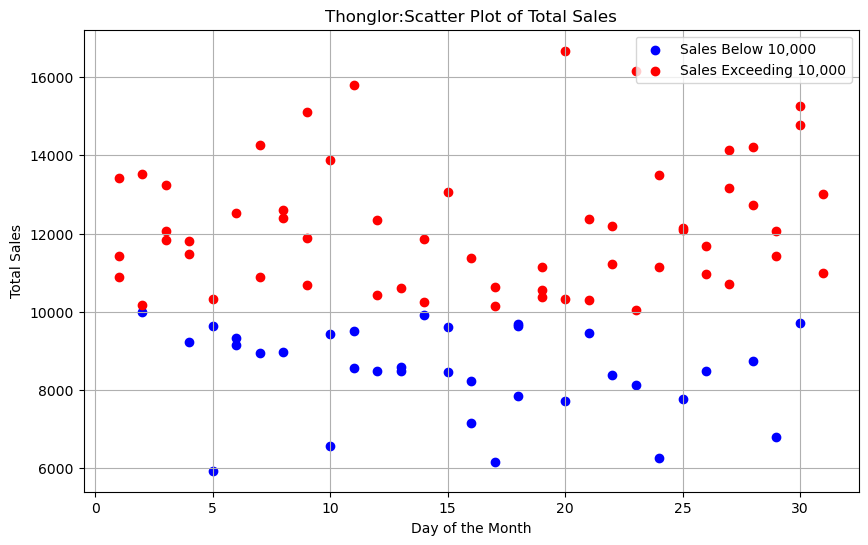

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Concatenate the dataframes
data_frames_t = [df_julyt, df_augustt, df_sept]
combined_df = pd.concat(data_frames_t)

# Convert the 'Date' column to datetime type
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Create a scatter plot to differentiate total sales
plt.figure(figsize=(10, 6))

# Filter data for sales below 10,000
below_10000 = combined_df[combined_df['Total Sales'] < 10000]
below_10000['Day'] = below_10000['Date'].dt.day  # Extract the day of the month
plt.scatter(below_10000['Day'], below_10000['Total Sales'], label='Sales Below 10,000', color='blue')

# Filter data for sales exceeding 10,000
exceed_10000 = combined_df[combined_df['Total Sales'] > 10000]
exceed_10000['Day'] = exceed_10000['Date'].dt.day  # Extract the day of the month
plt.scatter(exceed_10000['Day'], exceed_10000['Total Sales'], label='Sales Exceeding 10,000', color='red')

plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.title('Thonglor:Scatter Plot of Total Sales')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()